## **ZOMATO RESTAURANTS CLUSTERING & SENTIMENT ANALYSIS**

## **PROJECT TYPE:** Unsupervised ML (Clustering) & Sentiments Analysis

## **Contribution:** Individual (Harsh Vardhan)

**Github Link:** https://github.com/harshvardhan328/ZOMATO-RESTAURANTS-CLUSTERING-SENTIMENT-ANALYSIS

# **PROJECT SUMMARY**
Zomato is an Indian restaurant aggregator and food-delivery start-up started in 2008. provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities. The Project focuses on Customers and Company, and analyzing the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. This could help in clustering the restaurants into segments.

# **Text Preprocessing**
Data Preprocessing is the most essential step for any Machine Learning model. How well the raw data has been cleaned and preprocessed plays a major role in the performance of the model. Likewise in the case of NLP, the very first step is Text Processing.

The various preprocessing steps that are involved are:

• Lower Casing

• Tokenization

• Punctuation Mark Removal

• Stop Word Removal

• Stemming

• Lemmatization

# **EDA**


*   Performed Data Analysis of restaurants based on their cuisine costs, how expensive or affordable a restaurant is.
*   Plotted a word cloud to find words of reviews associated with cusines cost.
* Analysed review data on the basis of total reviews in a month, top reviewers, average ratings etc.

## Sentiments Analysis
Sentiment analysis (or opinion mining) is a natural language processing (NLP) technique used to determine whether data is positive, negative or neutral. Sentiment analysis is often performed on textual data to help businesses monitor brand and product sentiment in customer feedback, and understand customer needs. In this project tried to see the sentiment of the review given by the customers.

Subjectivity: Subjectivity quantifies the amount of personal opinion and factual information contained in the text. Subjectivity lies between [0,1]. The higher subjectivity means that the text contains personal opinion rather than factual information.

Polarity: Polarity score tells us how positive or negative the text is, it ranges between (- 1 to +1) if the score is negative it means sentiment is negative, if score is positive, it means sentiment is positive. If the Polarity score is 0, it means the text is neither positive nor negative but neutral.

## **CLUSTERING**
* Applied K-Means Clustering to cluster cuisine datapoints with respect to their costs and average ratings.
* Applied PCA to to cluster cuisines to find best among it on the basis ratings.

# **PROJECT ARCHITECTURE**

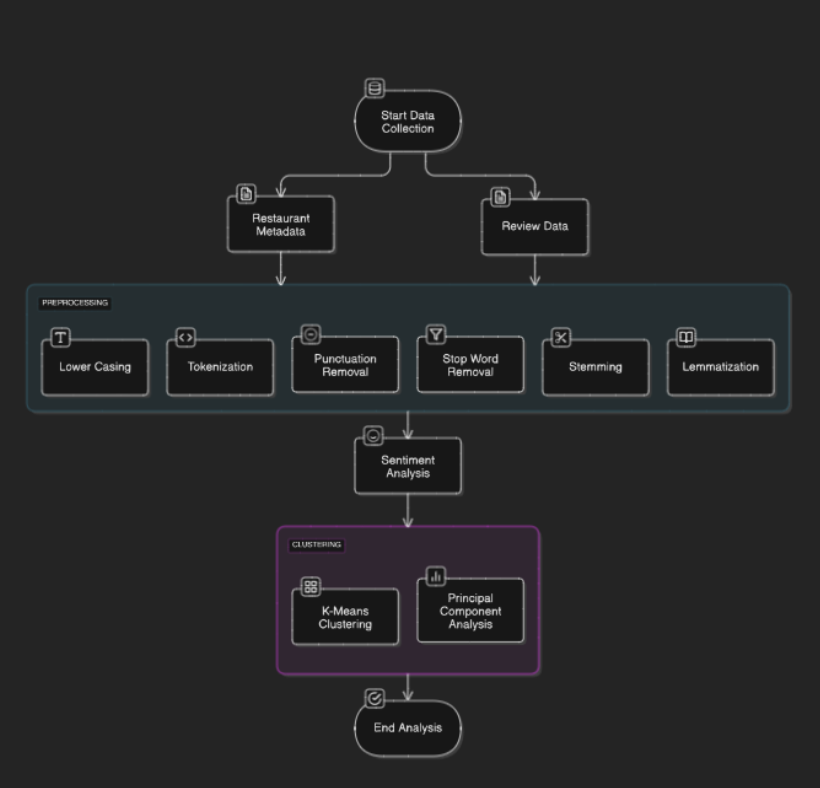




# **IMPORTING BASIC LIBRARIES**

In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# **DATASET LOADING**

In [230]:
import pandas as pd
meta_df_main=pd.read_csv('/content/drive/MyDrive/Zomato Restaurant names and Metadata (1).csv')
review_df=pd.read_csv('/content/drive/MyDrive/Zomato Restaurant reviews.csv')

In [231]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [232]:
# Making Copy of meta Data
meta_df = meta_df_main.copy()

In [233]:
meta_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [234]:
meta_df.shape

(105, 6)

In [235]:
review_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [236]:
review_df.shape

(10000, 7)

# **DATA PREPROCESSING**

In [237]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.1+ KB


In [238]:
meta_df.describe()

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [239]:
# Names of restaurants
meta_df['Name'].value_counts()

,count
Name,
Beyond Flavours,1
Paradise,1
Flechazo,1
Shah Ghouse Hotel & Restaurant,1
Over The Moon Brew Company,1
...,...
IndiBlaze,1
Sweet Basket,1
Angaara Counts 3,1


In [240]:
# Checking duplicate rows in dataset
meta_df.duplicated(keep='last').sum()

np.int64(0)

In [241]:
meta_df['Cost'] =  meta_df['Cost'].str.replace(",","").astype('int64')

In [242]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [243]:
review_df.describe()

,Pictures
count,10000.000000
mean,0.748600
std,2.570381
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,64.000000


In [244]:
review_df.isnull().sum()

,0
Restaurant,0
Reviewer,38
Review,45
Rating,38
Metadata,38
Time,38
Pictures,0


In [245]:
# Unique values in 'Rating' column
review_df['Rating'].unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like', nan],
      dtype=object)

In [246]:
import numpy as np
# Handling unwated values and changing string in float
review_df.loc[review_df['Rating'] == 'Like'] = np.nan
review_df['Rating']= review_df['Rating'].astype('float64')

In [247]:
print(review_df['Rating'].mean())

3.601044071880333


In [248]:
review_df['Rating'].fillna(3.6, inplace=True)

In [249]:
review_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0.0


In [250]:
# Split 'Metadata' column into two temporary columns
review_df[['Reviews', 'Followers']] = review_df['Metadata'].str.split(',', expand=True)

# Extract and convert 'Reviews' and 'Followers' to numeric
review_df['Reviews'] = pd.to_numeric(review_df['Reviews'].str.split(' ').str[0])
review_df['Followers'] = pd.to_numeric(review_df['Followers'].str.split(' ').str[1])

In [251]:
# Dropping Metadata column
review_df = review_df.drop(['Metadata'], axis=1)

In [252]:
# Converting Time column into Time, Year, Month, Hour
review_df['Time']=pd.to_datetime(review_df['Time'])
review_df['Year'] = pd.DatetimeIndex(review_df['Time']).year
review_df['Month'] = pd.DatetimeIndex(review_df['Time']).month
review_df['Hour'] = pd.DatetimeIndex(review_df['Time']).hour

In [253]:
review_df.isnull().sum()

,0
Restaurant,1
Reviewer,39
Review,46
Rating,0
Time,39
Pictures,1
Reviews,39
Followers,1617
Year,39
Month,39


In [254]:
# Replacing followers and reviews null values into 0
review_df['Followers'].fillna(0,inplace=True)
review_df['Reviews'].fillna(0,inplace=True)

In [255]:
# we can drop the remaining missing data
review_df.dropna(inplace=True)

In [256]:
#Resetting the index after dropping null values
review_df.reset_index(inplace = True)

# **DATA ANALYSIS OF RESTAURANTS METADATA**

In [257]:
#Finding the top 10 restaurants by Cost
top_10_costly_rest=meta_df[['Name','Cost']].groupby('Name',as_index=False).sum().sort_values(by='Cost',ascending=False).head(10)
top_10_costly_rest

,Name,Cost
23,Collage - Hyatt Hyderabad Gachibowli,2800
35,Feast - Sheraton Hyderabad Hotel,2500
0,10 Downing Street,1900
48,Jonathan's Kitchen - Holiday Inn Express & Suites,1900
20,Cascade - Radisson Hyderabad Hitec City,1800
102,Zega - Sheraton Hyderabad Hotel,1750
74,Republic Of Noodles - Lemon Tree Hotel,1700
60,Mazzo - Marriott Executive Apartments,1700
9,Arena Eleven,1600
12,B-Dubs,1600


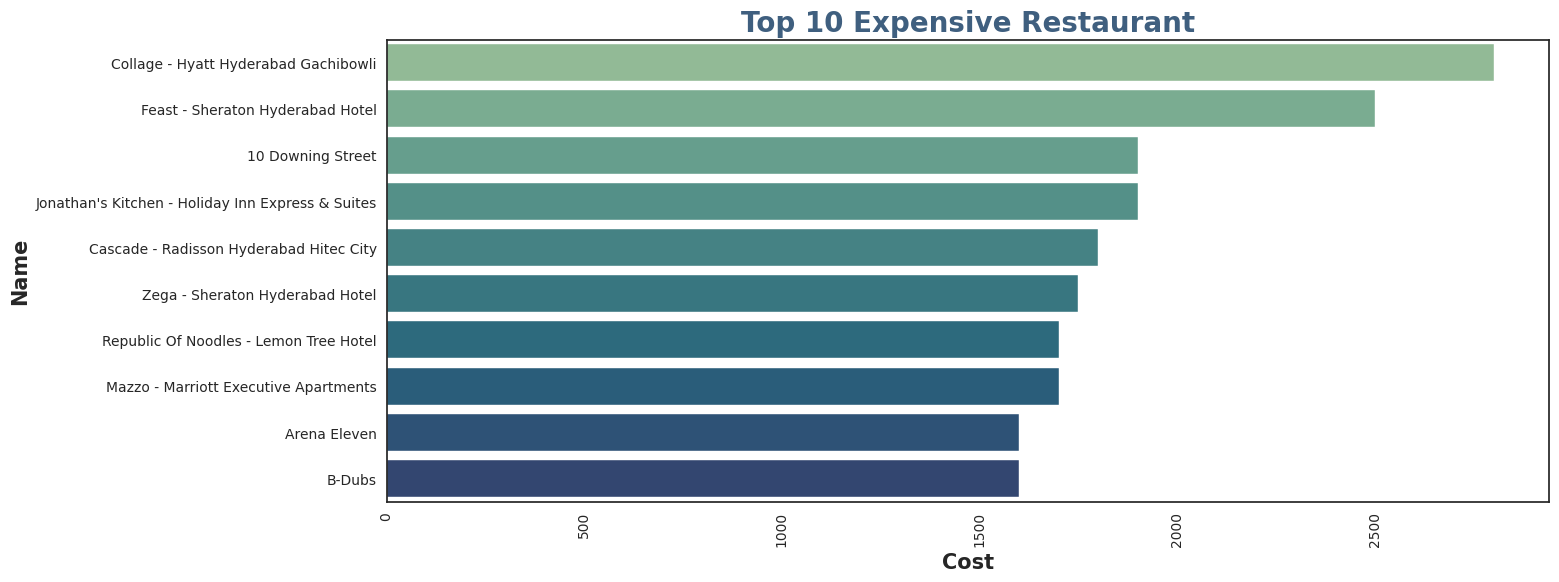

In [258]:
# Top 10 Expensive Restaurants
plt.figure(figsize=(15,6))
x = top_10_costly_rest['Cost']
y = top_10_costly_rest['Name']
plt.title("Top 10 Expensive Restaurant",fontsize=20,weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Name",weight='bold',fontsize=15)
plt.xlabel("Cost",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette='crest')
plt.show()

# **Insights**
Top 3 Costliest Restaurants:

1. Collage -Hyderabad Gachibowli.
2. Feast- Sheraton Hyderabad Hotel.
3. 10 Downing Street.

In [259]:
#Finding the top 10 affordable restaurants
top_10_affor_rest=meta_df[['Name','Cost']].groupby('Name',as_index=False).sum().sort_values(by='Cost',ascending=True).head(10)
top_10_affor_rest

,Name,Cost
7,Amul,150
61,Mohammedia Shawarma,150
43,Hunger Maggi Point,200
11,Asian Meal Box,200
62,Momos Delight,200
50,KS Bakers,200
83,Sweet Basket,200
100,Wich Please,250
79,Shah Ghouse Spl Shawarma,300
86,Tempteys,350


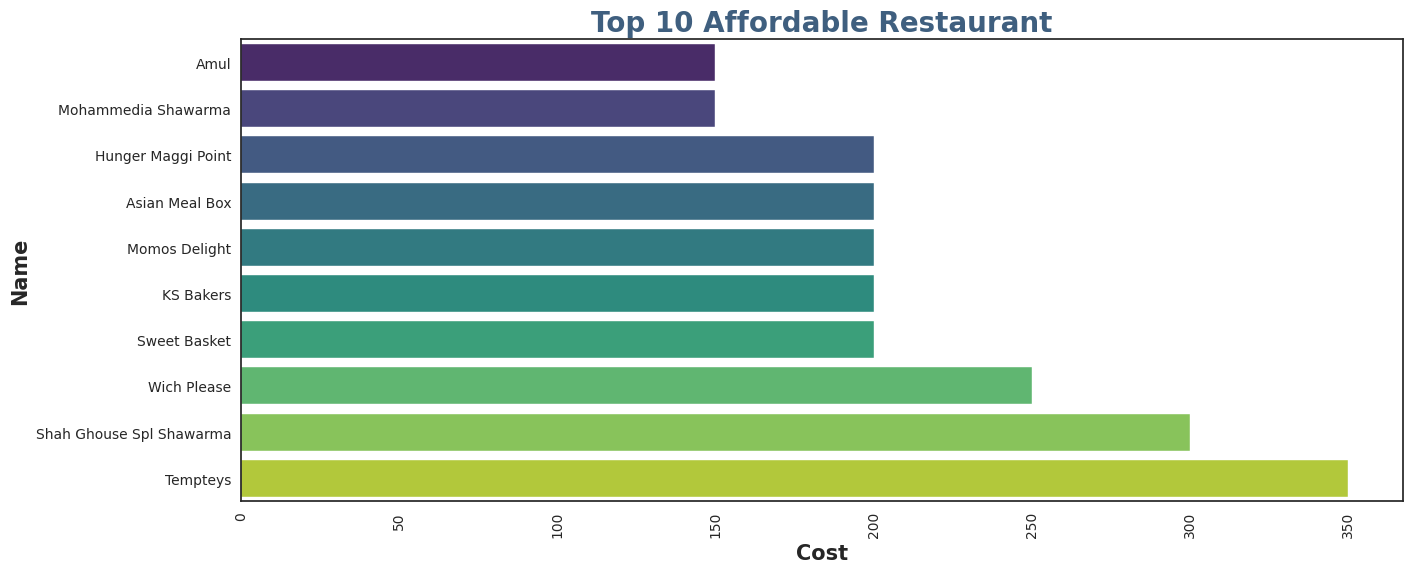

In [260]:
# Affordable price restaurants
plt.figure(figsize=(15,6))

x = top_10_affor_rest['Cost']
y = top_10_affor_rest['Name']
plt.title("Top 10 Affordable Restaurant",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Name",weight='bold',fontsize=15)
plt.xlabel("Cost",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette='viridis')
plt.show()

# Insights of Top 3 Affordable Restaurants
1. Mohammedia Shawrma with Cuisine cost around 145.
2. Amul with Cuisine cost around 150.
3. Sweet Basket with cost about 200.

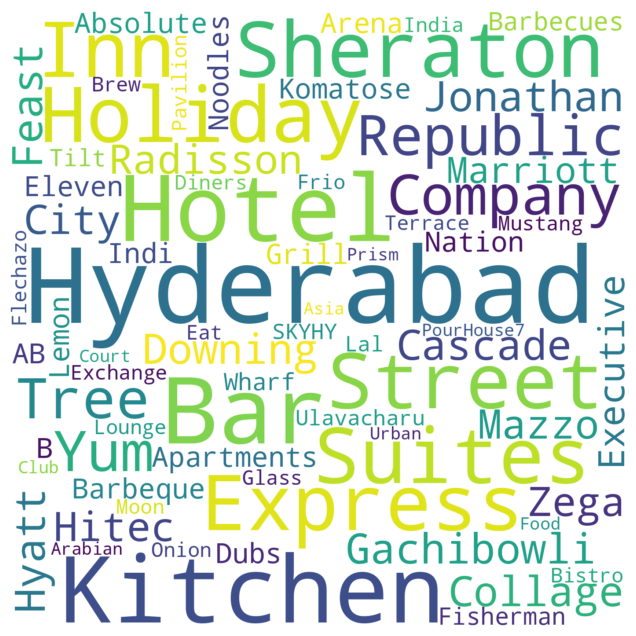

In [261]:
#Creating word cloud for expensive restaurants
plt.figure(figsize=(15,8))
text = " ".join(name for name in meta_df.sort_values('Cost',ascending=False).Name[:30])

# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'white').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## **Keywords for expensive retaurants : Hyderabad,Hotel,Barbecue,Bar,Suites etc.**

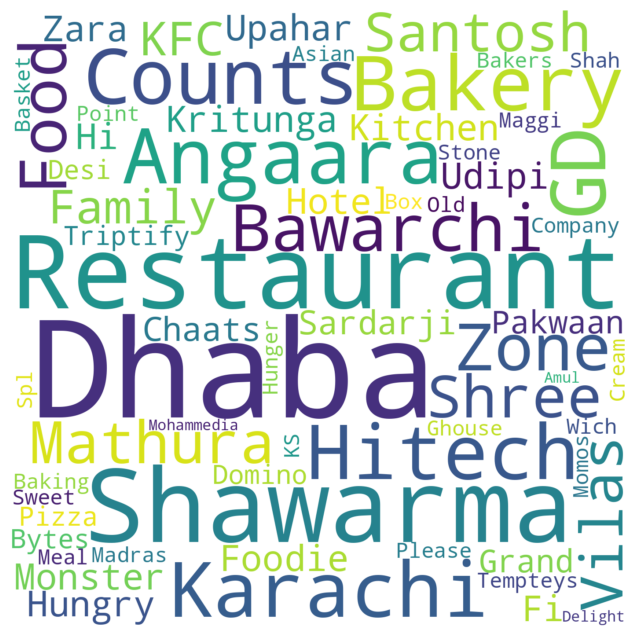

In [262]:
#Creating word cloud for affordable restaurants
plt.figure(figsize=(15,8))
text = " ".join(name for name in meta_df.sort_values('Cost',ascending=False).Name[-30:])

# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400, collocations = False, background_color = 'white').generate(text)

#Display the generated word Cloud

plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

## **Keywords for expensive retaurants : Hyderabad,Hotel,Barbecue,Bar,Suites etc.**

# **DATA ANALYSIS OF REVIEW DATA**

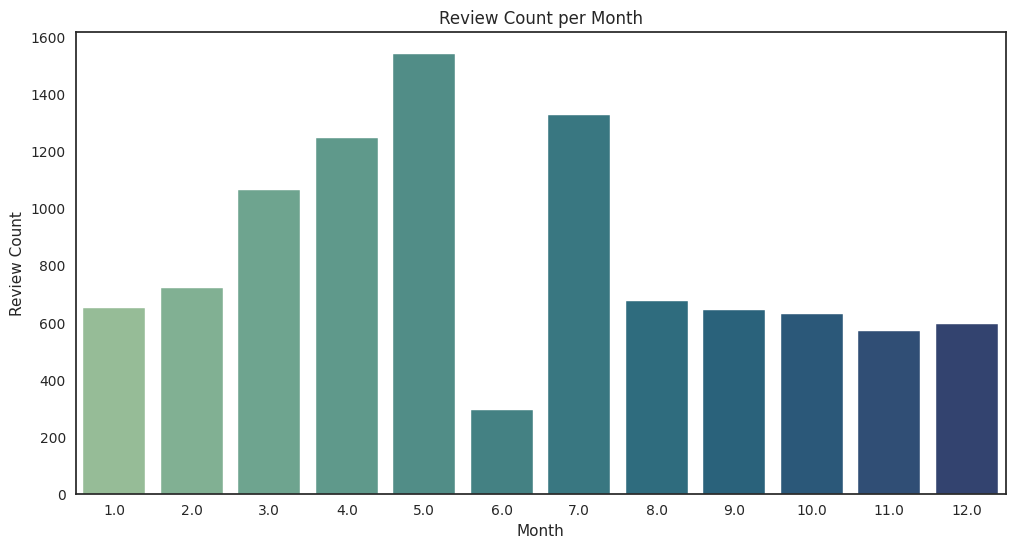

In [263]:
# Plotting No. of reviews given per month.
plt.figure(figsize=(12, 6))
sns.countplot(x='Month', data=review_df, palette='crest')
plt.title('Review Count per Month')
plt.xlabel('Month')
plt.ylabel('Review Count')
plt.show()

# **Insights:**
1. We can see a consistent rise in the number of reviews given from the month of January to April.
2. The month of May the number of reviews were highest with nearly 1500+ reviews.
3. In June, we can see there is sharp decline in the number of reviews. Again in the month of July we can see a sharp rise in the number of reviews.
4. There was again decline in the number of reviews in the month of August. After August, we can see the steadiness in the number of reviews ranging between 500 and 600.

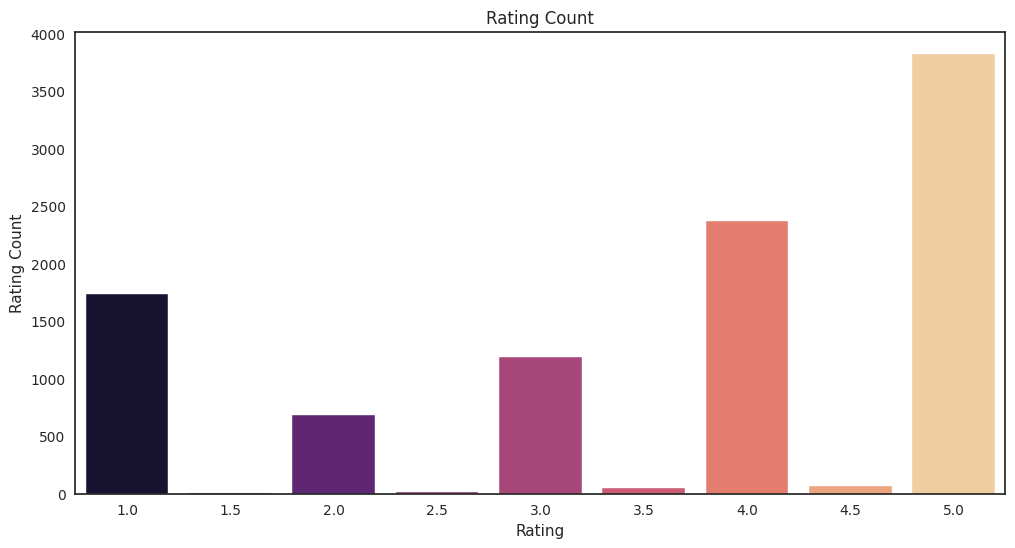

In [264]:
# Plotting Number of ratings
plt.figure(figsize=(12, 6))
sns.countplot(x='Rating', data=review_df, palette='magma')
plt.title('Rating Count')
plt.xlabel('Rating')
plt.ylabel('Rating Count')
plt.show()

# **Ratings Count Insights:**
1. Highest Rating Dominance (5-Star): The highest count is for the 5-star rating, suggesting that most users are highly satisfied with the product/service.
2. Good Engagement with 4-Star Ratings: The second-highest rating count is for 4-star ratings, indicating that a considerable number of users are satisfied but find room for improvement.
3. Low Counts for 2 and 3 Stars: Ratings of 2 and 3 stars have relatively lower counts, showing that fewer users had an average or slightly negative experience.
4. Significant Number of 1-Star Ratings: The presence of a high number of 1-star ratings suggests that a substantial number of users had a poor experience.
5. Minimal Engagement for 2.5, 3.5, and 4.5 Stars: The bar for half-point ratings (e.g., 2.5, 3.5, and 4.5) is very low, indicating that users generally tend to give whole-number ratings.

In [265]:
#Top Reviewers
reviewer_list = review_df.groupby('Reviewer').apply(lambda x: x['Reviewer'].count()).reset_index(name='Review_Count')
reviewer_list = reviewer_list.sort_values(by = 'Review_Count',ascending=False)
top_reviewers = reviewer_list[:10]
top_reviewers.head()

,Reviewer,Review_Count
654,Ankita,13
3855,Parijat Ray,13
2652,Kiran,12
7009,Vedant Killa,11
2311,Jay Mehta,11


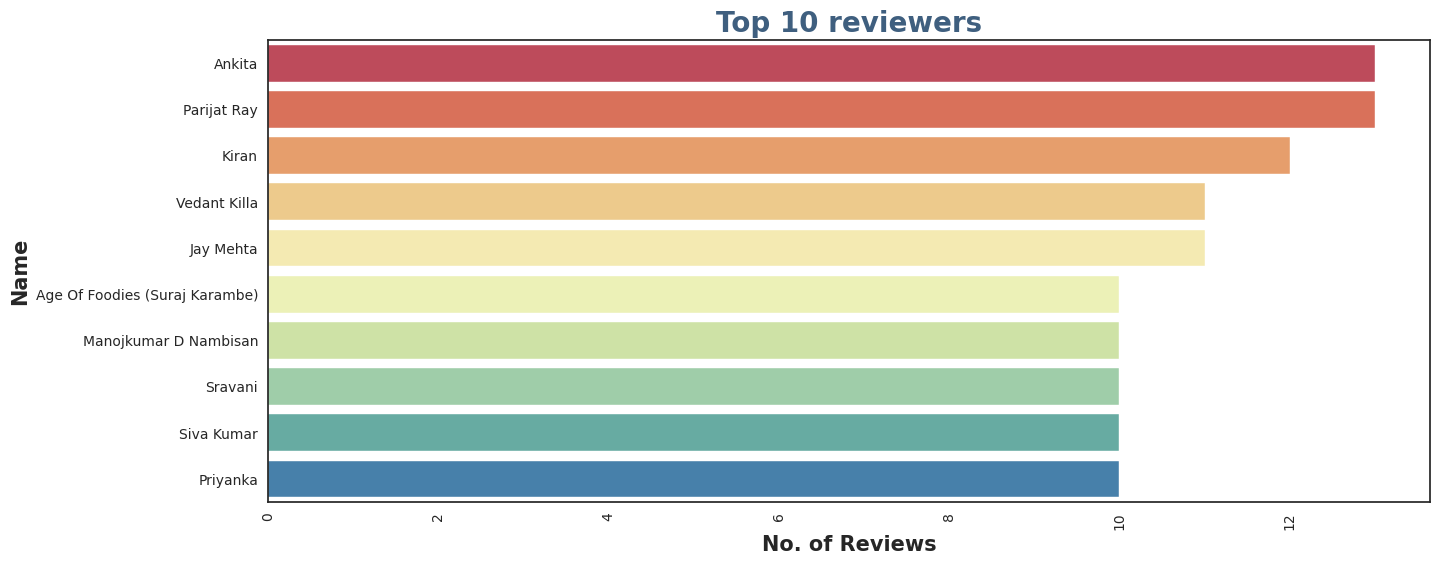

In [266]:
plt.figure(figsize=(15,6))
x = top_reviewers['Review_Count']
y = top_reviewers['Reviewer']
plt.title("Top 10 reviewers",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Name",weight='bold',fontsize=15)
plt.xlabel("No. of Reviews",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette='Spectral')
plt.show()

## **Reviewers Insights:**
1. Ankita and Parijat Ray Lead the Reviews

* Both reviewers have contributed the highest number of reviews, indicating their active engagement in reviewing products/services.
2. Kiran and Vedant Killa are Active Reviewers

* They follow closely behind the top two, showing significant participation in reviewing.
3. Gradual Decrease in Review Counts

* As we move down the list, the number of reviews decreases slightly, indicating a small but noticeable gap between highly active reviewers and others.
4. Presence of a Food Blogger (Age Of Foodies - Suraj Karambe)

* This suggests that influencers or bloggers might be involved in reviewing, impacting overall review trends.

In [267]:
review_ratings=review_df.groupby('Reviewer').apply(lambda x:np.average(x['Rating'])).reset_index(name='AverageRatings')
review_ratings=pd.merge(top_reviewers,review_ratings,how='inner',left_on='Reviewer',right_on='Reviewer')
top_reviewers_ratings=review_ratings[:5]
top_reviewers_ratings=top_reviewers_ratings.sort_values(by = 'AverageRatings',ascending=False)
top_reviewers_ratings.head()

,Reviewer,Review_Count,AverageRatings
2,Kiran,12,4.500000
3,Vedant Killa,11,4.000000
0,Ankita,13,3.923077
4,Jay Mehta,11,3.727273
1,Parijat Ray,13,3.192308


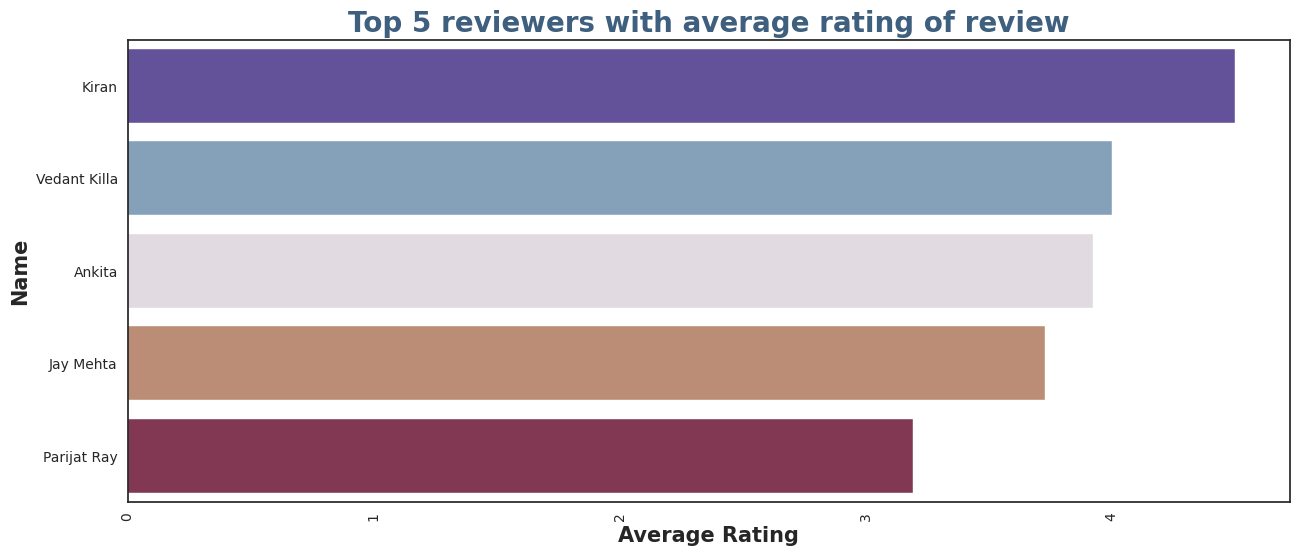

In [268]:
# Average rating of top reviewers
plt.figure(figsize=(15,6))
x = top_reviewers_ratings['AverageRatings']
y = top_reviewers_ratings['Reviewer']
plt.title("Top 5 reviewers with average rating of review",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Name",weight='bold',fontsize=15)
plt.xlabel("Average Rating",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette='twilight_shifted')
plt.show()

## **Top 5 Reviewers with Average Rating of Review**
1. Kiran Has the Highest Average Rating

* Kiran's reviews have the highest average rating among the top 5 reviewers. This suggests that Kiran generally gives high ratings, indicating a positive reviewing tendency.
2. Vedant Killa and Ankita Have Slightly Lower Ratings

* Their average ratings are slightly lower than Kiran's but still relatively high. This suggests they provide mostly positive feedback with some variation.
3. Jay Mehta and Parijat Ray Have the Lowest Average Ratings

* Their bars are shorter, indicating that they give lower ratings on average compared to the other reviewers. This may suggest a more critical reviewing approach.
4. Balanced Distribution of Ratings

* While there is a difference in ratings, no reviewer has an extreme low or high score, indicating a balanced and realistic review distribution.

In [269]:
# Review per hour
reviews_hour = review_df.groupby('Hour').apply(lambda x: x['Hour'].count()).reset_index(name='Reviews_per_hour')

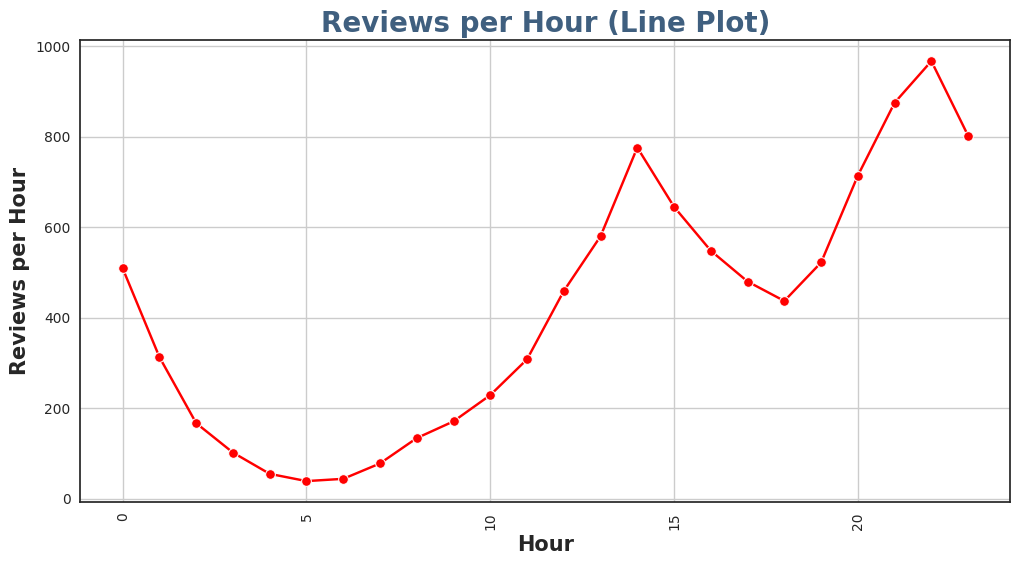

In [270]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Hour', y='Reviews_per_hour', data=reviews_hour, marker='o', color='red')
plt.title('Reviews per Hour (Line Plot)', fontsize=20, weight='bold', color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel('Reviews per Hour', weight='bold', fontsize=15)
plt.xlabel('Hour', weight='bold', fontsize=15)
plt.xticks(rotation=90)
plt.grid()
plt.show()

## **Reviews per Hour Insights**

---


1. Peak Review Hours (High Activity)

* The highest number of reviews occur around 14:00 (2 PM), 21:00 (9 PM), and 22:00 (10 PM).
* This suggests that users are most active in the afternoon and evening hours.

---


2. Lowest Review Activity (Early Morning)

* Between 4:00 AM and 6:00 AM, the number of reviews is at its lowest.
* This is expected, as most users may be inactive or sleeping during these hours.

---


3. Gradual Increase After Morning Hours

* After 6:00 AM, the review count starts increasing gradually, reaching a significant peak around 2 PM.
* This suggests that users start becoming active as the day progresses.
---
4. Evening Surge in Reviews

* There is another sharp rise in reviews starting from 6 PM onwards, reaching the highest peak at 10 PM.
* This could indicate that people tend to write reviews after work hours or during leisure time.


(np.float64(-0.5), np.float64(1399.5), np.float64(1399.5), np.float64(-0.5))

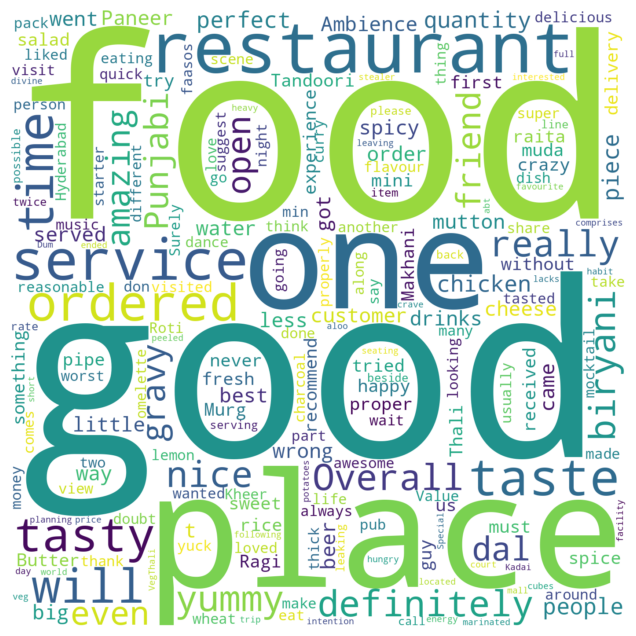

In [271]:
#Creating word cloud for reviews
plt.figure(figsize=(15,8))
text = " ".join(name for name in review_df.sort_values('Review',ascending=False).Review[:30])


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'white').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

## **Major Keywords in Reviews:**

---


Good, Service, food, Overall, tasty, ordered etc.

# **Cuisines Data Pre-processing & Analysis**

In [272]:
#Importing Stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [273]:
# extracting the stopwords from nltk library
sw = stopwords.words('english')

In [274]:
#Function for removing stop words
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [275]:
# Removing stopwords from Cuisines
meta_df['Cuisines'] = meta_df['Cuisines'].apply(lambda text: stopwords(text))
meta_df['Cuisines'].head()

,Cuisines
0,"chinese, continental, kebab, european, south i..."
1,"biryani, north indian, chinese"
2,"asian, mediterranean, north indian, desserts"
3,"biryani, north indian, chinese, seafood, bever..."
4,"asian, continental, north indian, chinese, med..."


In [276]:
#Function for removing punctuations
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space,
    # which in effect deletes the punctuation marks
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [277]:
meta_df['Cuisines'] = meta_df['Cuisines'].apply(lambda x : remove_punctuation(x))
meta_df['Cuisines'].head()

,Cuisines
0,chinese continental kebab european south india...
1,biryani north indian chinese
2,asian mediterranean north indian desserts
3,biryani north indian chinese seafood beverages
4,asian continental north indian chinese mediter...


In [278]:
# Removing repeating characters
import re
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)

In [279]:
meta_df['Cuisines'] = meta_df['Cuisines'].apply(lambda x : cleaning_repeating_char(x))
meta_df['Cuisines'].head()

,Cuisines
0,chinese continental kebab european south india...
1,biryani north indian chinese
2,asian mediterranean north indian desserts
3,biryani north indian chinese seafood beverages
4,asian continental north indian chinese mediter...


In [280]:
#Cleaning numbers
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

In [281]:
meta_df['Cuisines'] = meta_df['Cuisines'].apply(lambda x: cleaning_numbers(x))
meta_df['Cuisines'].head()

,Cuisines
0,chinese continental kebab european south india...
1,biryani north indian chinese
2,asian mediterranean north indian desserts
3,biryani north indian chinese seafood beverages
4,asian continental north indian chinese mediter...


In [282]:
#Count of each cusine
from collections import Counter
text = ' '.join(meta_df['Cuisines'])
words = text.split()

two_words = {' '.join(words):n for words,n in Counter(zip(words, words[1:])).items() if not  words[0][-1]==(',')}

In [283]:
#Creating dataframe with Cusine frequency
word_freq = pd.DataFrame(two_words.items(), columns=['Cuisine_Words', 'Frequency'])
word_freq = word_freq.sort_values(by = "Frequency", ascending = False)
word_freq_20 = word_freq[:20]

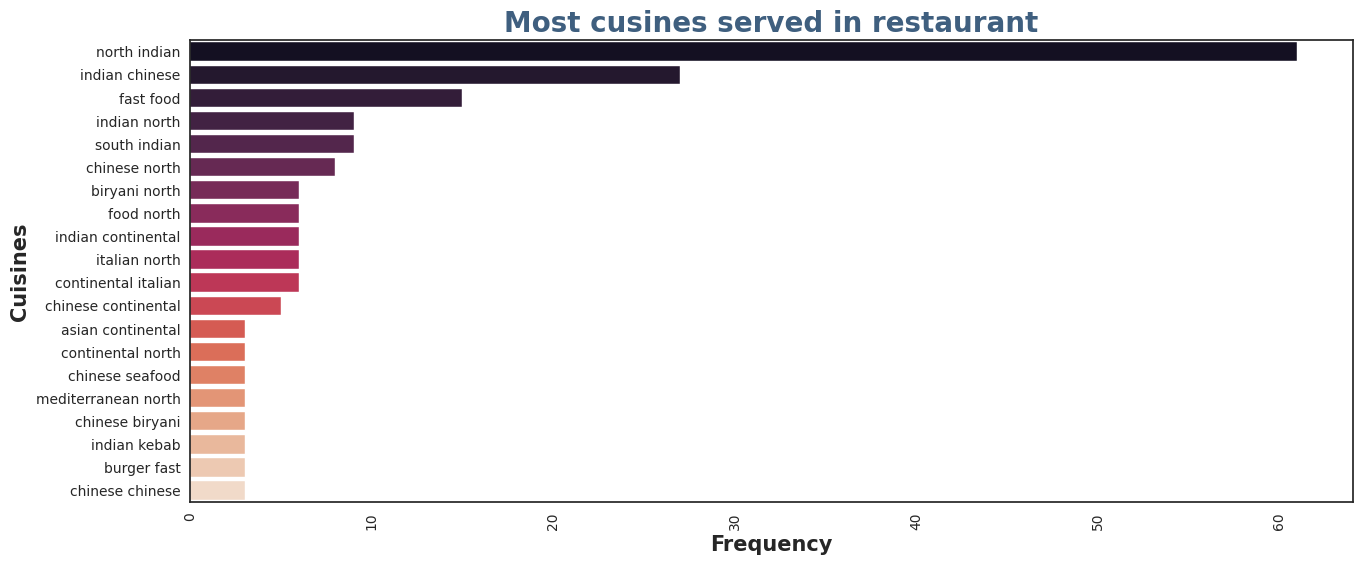

In [284]:
# most cusines served in restaurant
plt.figure(figsize=(15,6))
y = word_freq_20['Cuisine_Words']
x = word_freq_20['Frequency']
plt.title("Most cusines served in restaurant",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Cuisines",weight='bold',fontsize=15)
plt.xlabel("Frequency",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette="rocket")
plt.show()

# **Insights from the Chart: Most Cuisines Served in Restaurants**

---


1. Dominance of North Indian Cuisine

* North Indian cuisine is the most frequently served, significantly surpassing other cuisines.
* This suggests a high demand for North Indian food in the restaurant industry.
2. Popularity of Indian-Chinese and Fast Food

* Indian-Chinese cuisine ranks second, indicating a strong preference for fusion dishes.
* Fast food also ranks high, showing its widespread availability and consumer preference.
3. South Indian Cuisine is Also Popular

* South Indian cuisine appears in the top five, proving its strong presence in restaurant menus.
4. Fusion and Continental Cuisines are Gaining Popularity

* Variants like Indian Continental, Chinese North, Continental Italian, and Chinese Continental indicate that many restaurants are offering mixed cuisines to cater to diverse tastes.
5. Niche Cuisines Like Indian Kebab, Mughlai, and Desserts Are Also Present

* Though not as common as North Indian or Fast Food, cuisines like Indian Kebab, Mughlai, and Desserts Café suggest that there are specialty restaurants focusing on these options.

(np.float64(-0.5), np.float64(1399.5), np.float64(1399.5), np.float64(-0.5))

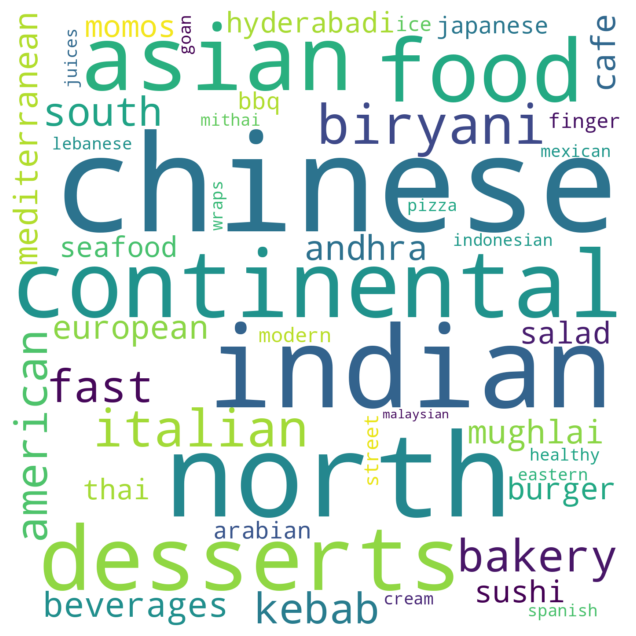

In [285]:
#Wordcloud for Cuisine
plt.figure(figsize=(15,8))
text = " ".join(name for name in word_freq.Cuisine_Words )


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'white').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

# **Important Keywords in Cuisines Data:**

---
north, indian, chinese, continental, american etc.



# **TEXT PREPROCESSING FOR SENTIMENT ANALYSIS**

---



In [286]:
#Stroing reviews in new dataframe
review= review_df.Review
review

,Review
0,"The ambience was good, food was quite good . h..."
1,Ambience is too good for a pleasant evening. S...
2,A must try.. great food great ambience. Thnx f...
3,Soumen das and Arun was a great guy. Only beca...
4,Food is good.we ordered Kodi drumsticks and ba...
...,...
9949,Madhumathi Mahajan Well to start with nice cou...
9950,This place has never disappointed us.. The foo...
9951,"Bad rating is mainly because of ""Chicken Bone ..."
9952,I personally love and prefer Chinese Food. Had...


In [287]:
# removing punctuations
review_df['Review'] = review_df['Review'].apply(remove_punctuation)

In [288]:
# Removing Stopwords
review_df['Review'] = review_df['Review'].apply(stopwords)

In [289]:
review=review_df.Review
review

,Review
0,ambience good food quite good saturday lunch c...
1,ambience good pleasant evening service prompt ...
2,must try great food great ambience thnx servic...
3,soumen das arun great guy behavior sincerety g...
4,food goodwe ordered kodi drumsticks basket mut...
...,...
9949,madhumathi mahajan well start nice courteous s...
9950,place never disappointed us food courteous sta...
9951,bad rating mainly chicken bone found veg food ...
9952,personally love prefer chinese food couple tim...


In [290]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [291]:
# Function for lemmatization
def lemmatization_(text):
  for index,x in enumerate(text):
    doc = nlp(x)
    l=list()
    for word in doc:
        l.append(word.lemma_)
    text[index]=' '.join(l)
  return text

In [292]:
# Applying lematization
review=lemmatization_(review)

In [293]:
# function for removing extra spaces
def remove_spaces (text):
  '''removes all extra space from the text
  '''
  for index,x in enumerate(text):
    text[index]=" ".join(x.split())
  return text

In [294]:
# Remove non letters
import re
regex = re.compile('[^a-zA-Z]')
def remove_non_leters(text):
  '''used to remove all non leters form the list
  '''
  text=[regex.sub(' ', x) for x in text]
  return text

In [295]:
review=remove_non_leters(review)

In [296]:
# storing the reviews in a feature of df
review_df['Review']=review
review_df.head()

,index,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
0,0,Beyond Flavours,Rusha Chakraborty,ambience good food quite good saturday lunch c...,5.0,2019-05-25 15:54:00,0.0,1.0,2.0,2019.0,5.0,15.0
1,1,Beyond Flavours,Anusha Tirumalaneedi,ambience good pleasant evening service prompt ...,5.0,2019-05-25 14:20:00,0.0,3.0,2.0,2019.0,5.0,14.0
2,2,Beyond Flavours,Ashok Shekhawat,must try great food great ambience thnx servic...,5.0,2019-05-24 22:54:00,0.0,2.0,3.0,2019.0,5.0,22.0
3,3,Beyond Flavours,Swapnil Sarkar,soumen das arun great guy behavior sincerety g...,5.0,2019-05-24 22:11:00,0.0,1.0,1.0,2019.0,5.0,22.0
4,4,Beyond Flavours,Dileep,food goodwe order kodi drumstick basket mutton...,5.0,2019-05-24 21:37:00,0.0,3.0,2.0,2019.0,5.0,21.0


In [297]:
#function to removing words greater than 45 and less than 2
def len_less_than2(review):
  review=" ".join([i for i in review.split() if len(i)>2])
  review=" ".join([i for i in review.split() if len(i)<=45])
  return review

In [298]:
#removing words greater than 45 and less than 2
review_df['Review']=review_df['Review'].apply(lambda x:len_less_than2(x))

In [299]:
review_df.head()

,index,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
0,0,Beyond Flavours,Rusha Chakraborty,ambience good food quite good saturday lunch c...,5.0,2019-05-25 15:54:00,0.0,1.0,2.0,2019.0,5.0,15.0
1,1,Beyond Flavours,Anusha Tirumalaneedi,ambience good pleasant evening service prompt ...,5.0,2019-05-25 14:20:00,0.0,3.0,2.0,2019.0,5.0,14.0
2,2,Beyond Flavours,Ashok Shekhawat,must try great food great ambience thnx servic...,5.0,2019-05-24 22:54:00,0.0,2.0,3.0,2019.0,5.0,22.0
3,3,Beyond Flavours,Swapnil Sarkar,soumen das arun great guy behavior sincerety g...,5.0,2019-05-24 22:11:00,0.0,1.0,1.0,2019.0,5.0,22.0
4,4,Beyond Flavours,Dileep,food goodwe order kodi drumstick basket mutton...,5.0,2019-05-24 21:37:00,0.0,3.0,2.0,2019.0,5.0,21.0


# **SENTIMENT ANALYSIS WITH POLARITY & SUBJECTIVITY**

---



In [300]:
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import plotly.express as px

In [301]:
#Create a function to get the subjectivity
def subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [302]:
#Create a function to get the polarity
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [303]:
#Create two new columns
review_df['Subjectivity'] = review_df['Review'].apply(subjectivity)
review_df['Polarity'] = review_df['Review'].apply(polarity)

In [304]:
#Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
    if score <0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [305]:
review_df['Analysis'] = review_df['Polarity'].apply(getAnalysis)

In [306]:
review_df.head()

,index,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour,Subjectivity,Polarity,Analysis
0,0,Beyond Flavours,Rusha Chakraborty,ambience good food quite good saturday lunch c...,5.0,2019-05-25 15:54:00,0.0,1.0,2.0,2019.0,5.0,15.0,0.720000,0.660000,Positive
1,1,Beyond Flavours,Anusha Tirumalaneedi,ambience good pleasant evening service prompt ...,5.0,2019-05-25 14:20:00,0.0,3.0,2.0,2019.0,5.0,14.0,0.691667,0.708333,Positive
2,2,Beyond Flavours,Ashok Shekhawat,must try great food great ambience thnx servic...,5.0,2019-05-24 22:54:00,0.0,2.0,3.0,2019.0,5.0,22.0,0.675000,0.550000,Positive
3,3,Beyond Flavours,Swapnil Sarkar,soumen das arun great guy behavior sincerety g...,5.0,2019-05-24 22:11:00,0.0,1.0,1.0,2019.0,5.0,22.0,0.675000,0.750000,Positive
4,4,Beyond Flavours,Dileep,food goodwe order kodi drumstick basket mutton...,5.0,2019-05-24 21:37:00,0.0,3.0,2.0,2019.0,5.0,21.0,0.566667,0.600000,Positive


In [307]:
review_df['Analysis'].value_counts()

,count
Analysis,
Positive,7492
Negative,1869
Neutral,593


In [308]:
fig = px.scatter(review_df,
                 x='Polarity',
                 y='Subjectivity',
                 color = 'Analysis',
                 size='Subjectivity')
fig.update_layout(title='Sentiment Analysis',
                  shapes=[dict(type= 'line',
                               yref= 'paper', y0= 0, y1= 1,
                               xref= 'x', x0= 0, x1= 0)])
fig.show()

# **ANALYSING THE SNTIMENTS ON THE BASIS OF POLARITY & SUBJECTIVITY**

---
1. Understanding the Axes:
* X-axis (Polarity): Represents sentiment polarity.
Values range from -1 to 1:
* Negative sentiment (Red, Left side) → Polarity < 0
* Neutral sentiment (Green, Center at 0) → Polarity ≈ 0
* Positive sentiment (Blue, Right side) → Polarity > 0
* Y-axis (Subjectivity): Represents the degree of subjectivity.
* Values range from 0 to 1:
*  Lower values (0-0.5) → More objective (factual statements)
Higher values (0.5-1) → More subjective (opinions, personal expressions)

---


2. Key Observations from the Plot:

  **Negative Sentiments (Red - Left side):**

* Spread across -1 to 0 polarity.
Many points have a higher subjectivity, indicating that most negative reviews are opinion-based rather than factual.

  **Positive Sentiments (Blue - Right side):**

* Spread across 0 to 1 polarity.
* The density is higher, meaning more positive reviews exist.
* Many of these are also highly subjective, showing a tendency for users to express strong personal opinions in positive feedback.

  **Neutral Sentiments (Green - Center at Polarity ≈ 0):**

* Very few neutral reviews (limited data points).
* These are aligned around the vertical center (polarity = 0), indicating they are neither strongly positive nor negative.
---
3. Insights from the Analysis:

**Higher Subjectivity for Strong Opinions:**

* Both strongly negative and strongly positive reviews tend to be more subjective rather than purely factual. Positive Sentiment dominates.
* More data points fall in the positive region, suggesting that overall sentiment is more optimistic.
Fewer Neutral Reviews:
* There are very few neutral reviews, meaning most feedback is either strongly positive or negative.


# **Data Preprocessing for Clustering**

---



In [309]:
# converting the cuisines to lower case
meta_df_main['Cuisines'] = meta_df_main['Cuisines'].apply(lambda x : x.lower())

In [310]:
cuisine_df=meta_df_main.loc[:,['Name','Cost','Cuisines']]

In [311]:
# splitting the cuisine
cuisine_df['Cuisines'] = cuisine_df['Cuisines'].str.replace(' ','')
cuisine_df['Cuisines'] = cuisine_df['Cuisines'].str.split(',')

In [312]:
cuisine_df.head()

,Name,Cost,Cuisines
0,Beyond Flavours,800,"[chinese, continental, kebab, european, southi..."
1,Paradise,800,"[biryani, northindian, chinese]"
2,Flechazo,"1,300","[asian, mediterranean, northindian, desserts]"
3,Shah Ghouse Hotel & Restaurant,800,"[biryani, northindian, chinese, seafood, bever..."
4,Over The Moon Brew Company,"1,200","[asian, continental, northindian, chinese, med..."


In [313]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer(sparse_output=True)

In [314]:
cuisine_df = cuisine_df.join(pd.DataFrame.sparse.from_spmatrix(mlb.fit_transform(cuisine_df.pop('Cuisines')),
                                                               index=cuisine_df.index, columns=mlb.classes_))

In [315]:
cuisine_df.head()

,Name,Cost,american,andhra,arabian,asian,bakery,bbq,beverages,biryani,...,northindian,pizza,salad,seafood,southindian,spanish,streetfood,sushi,thai,wraps
0,Beyond Flavours,800,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,Paradise,800,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,Flechazo,"1,300",0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,Shah Ghouse Hotel & Restaurant,800,0,0,0,0,0,0,1,1,...,1,0,0,1,0,0,0,0,0,0
4,Over The Moon Brew Company,"1,200",0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [316]:
review_df['Rating'].unique()

array([5. , 4. , 1. , 3. , 2. , 3.5, 4.5, 2.5, 1.5])

In [317]:
# Remove nan rating in Rating column
review_df.dropna(subset=['Rating'],inplace=True)
review_df['Rating'] = review_df['Rating'].replace('Like', '4')
# Change data type of rating column to float
review_df['Rating']= review_df['Rating'].astype('float')
review_df.dropna(subset =['Review'], inplace=True)

# Average ratings of the each restaurant
ratings_df  = review_df.groupby('Restaurant')['Rating'].mean().reset_index()
ratings_df .sort_values(by='Rating',ascending = False).head(10)

,Restaurant,Rating
3,AB's - Absolute Barbecues,4.88
11,B-Dubs,4.81
2,"3B's - Buddies, Bar & Barbecue",4.76
67,Paradise,4.70
35,Flechazo,4.66
87,The Indi Grill,4.60
97,Zega - Sheraton Hyderabad Hotel,4.45
64,Over The Moon Brew Company,4.34
16,Beyond Flavours,4.28
19,Cascade - Radisson Hyderabad Hitec City,4.26


In [318]:
# Merging two data sets
df_cluster = cuisine_df.merge(ratings_df, left_on='Name',right_on='Restaurant')

In [319]:
df_cluster.head()

,Name,Cost,american,andhra,arabian,asian,bakery,bbq,beverages,biryani,...,salad,seafood,southindian,spanish,streetfood,sushi,thai,wraps,Restaurant,Rating
0,Beyond Flavours,800,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,Beyond Flavours,4.28
1,Paradise,800,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,Paradise,4.70
2,Flechazo,"1,300",0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,Flechazo,4.66
3,Shah Ghouse Hotel & Restaurant,800,0,0,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,Shah Ghouse Hotel & Restaurant,3.21
4,Over The Moon Brew Company,"1,200",0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,Over The Moon Brew Company,4.34


In [320]:
# Changing name and order of columns
df_cluster = df_cluster[['Name', 'Cost','Rating', 'american', 'andhra', 'arabian', 'asian', 'bbq',
       'bakery', 'beverages', 'biryani', 'burger', 'cafe', 'chinese',
       'continental', 'desserts', 'european', 'fastfood', 'fingerfood', 'goan',
       'healthyfood', 'hyderabadi', 'icecream', 'indonesian', 'italian',
       'japanese', 'juices', 'kebab', 'lebanese', 'malaysian', 'mediterranean',
       'mexican', 'mithai', 'modernindian', 'momos', 'mughlai', 'northeastern',
       'northindian', 'pizza', 'salad', 'seafood', 'southindian', 'spanish',
       'streetfood', 'sushi', 'thai', 'wraps']]

In [321]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 47 columns):
 #   Column         Non-Null Count  Dtype           
---  ------         --------------  -----           
 0   Name           100 non-null    object          
 1   Cost           100 non-null    object          
 2   Rating         100 non-null    float64         
 3   american       1 non-null      Sparse[int64, 0]
 4   andhra         1 non-null      Sparse[int64, 0]
 5   arabian        1 non-null      Sparse[int64, 0]
 6   asian          1 non-null      Sparse[int64, 0]
 7   bbq            1 non-null      Sparse[int64, 0]
 8   bakery         1 non-null      Sparse[int64, 0]
 9   beverages      1 non-null      Sparse[int64, 0]
 10  biryani        1 non-null      Sparse[int64, 0]
 11  burger         1 non-null      Sparse[int64, 0]
 12  cafe           1 non-null      Sparse[int64, 0]
 13  chinese        1 non-null      Sparse[int64, 0]
 14  continental    1 non-null      Sparse[int64

In [322]:
# Converting cost column into numerical type
df_cluster['Cost']= df_cluster['Cost'].str.replace(',','')

In [323]:
df_cluster['Cost']= df_cluster['Cost'].astype('float')

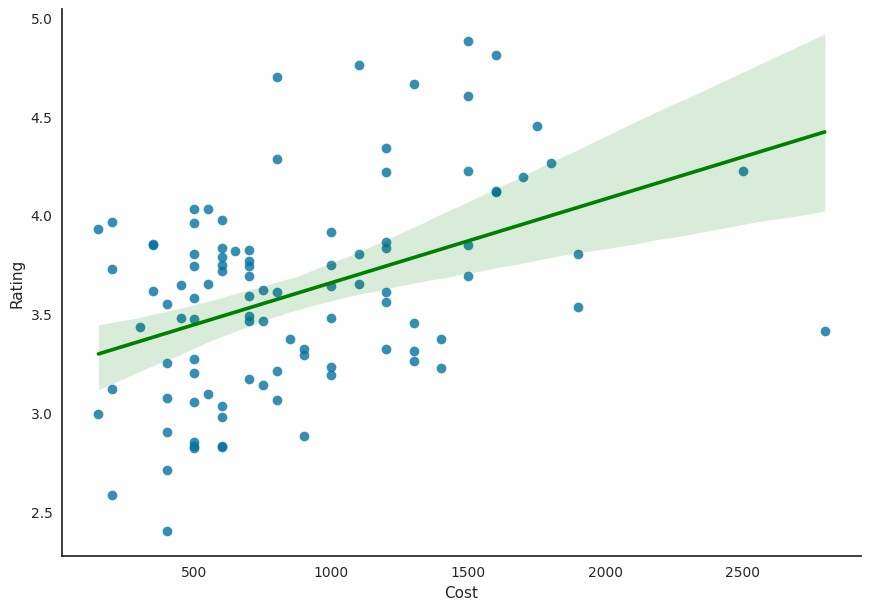

In [324]:
# Corelation Plot between Cost and rating
sns.lmplot(y='Rating',x='Cost',data=df_cluster,line_kws={'color' :'green'},height=6.27, aspect=11.7/8.27)

# **Insights from the Cost vs. Rating Scatter Plot with Regression Line**

---
1. General Trend:
* The regression line has a positive slope, indicating that higher costs are associated with higher ratings.
* This suggests that as the cost of a product/service increases, customers tend to rate it more favorably.
---
2. Strength of the Correlation:
* The data points are somewhat scattered around the regression line, meaning the correlation is moderate but not very strong.
* There is some variability, implying that while cost influences ratings, other factors also play a role.
---
3. Confidence Interval Analysis:
* The green shaded area represents the confidence interval of the regression model.
* The wider confidence interval at higher costs suggests more uncertainty in predicting ratings for expensive products.
---
4. Data Distribution Observations:
* Most ratings fall between 3.0 and 4.5, with a few outliers below 2.5.
* Many lower-cost products have mixed ratings, showing both high and low satisfaction.
* Higher-cost products generally receive better ratings, with fewer low-rated instances.



# **CLUSTERING**

In [325]:
# Import Libraries
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

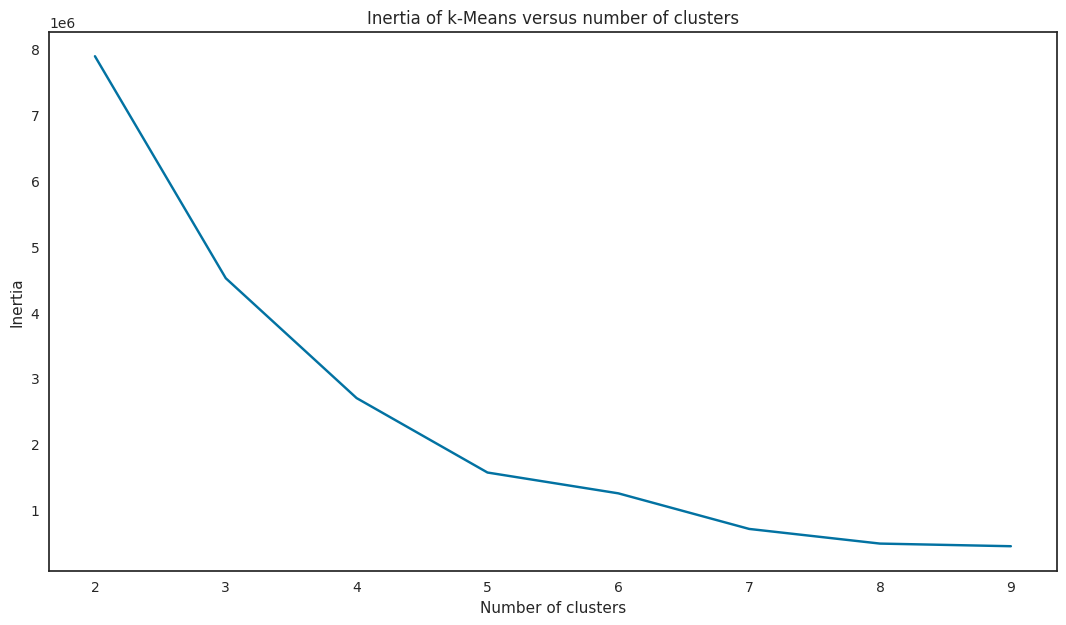

In [326]:
# Ploting Grapgh for different size of clusters
scores = [KMeans(n_clusters=i+2, random_state=11).fit(df_cluster.drop('Name',axis =1)).inertia_
          for i in range(8)]
plt.figure(figsize=(13,7))
# Pass data as a dictionary to lineplot
sns.lineplot(x=np.arange(2, 10), y=scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

# **Insights from the Elbow Method Plot for K-Means Clustering**

---
1. **Identifying the Elbow Point:**

* The graph shows a sharp decline in inertia from K=2 to K=5, indicating that adding clusters significantly reduces within-cluster variance.
* After K=5, the rate of decrease in inertia slows down, forming an elbow shape at K=5.
* This suggests that K=5 is likely the optimal number of clusters, as adding more clusters beyond this point provides diminishing returns.
---
2. **Interpretation of the Elbow Method:**
* The elbow point represents the balance between minimizing inertia and avoiding overfitting with too many clusters.
* Choosing a value beyond the elbow (e.g., K=6, K=7) does not significantly improve cluster separation while increasing complexity.



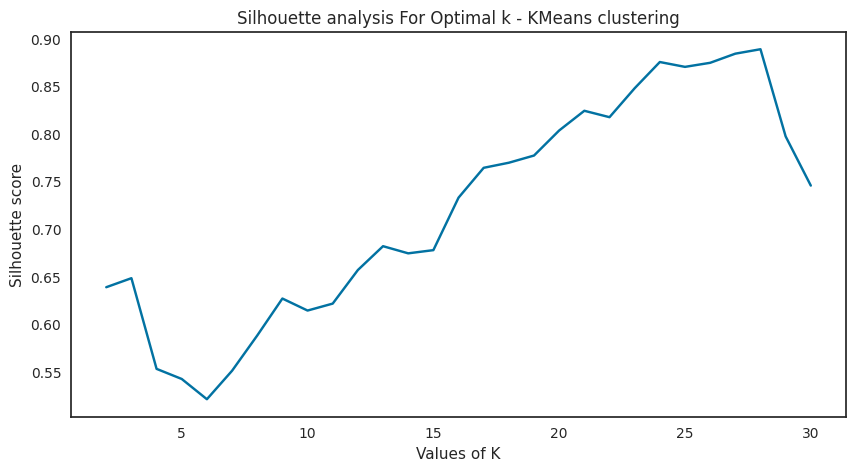

In [327]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,31)
silhouette_avg = []
for num_clusters in range_n_clusters:
  # initialize kmeans
  kmeans = KMeans(n_clusters=num_clusters,init='k-means++',random_state=33)
  kmeans.fit(df_cluster.drop('Name',axis =1))
  cluster_labels = kmeans.labels_

  # silhouette score
  silhouette_avg.append(silhouette_score(df_cluster.drop('Name',axis=1), cluster_labels))

plt.figure(figsize=(10,5))
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

# **Insights from Silhouette Score**

---
1. Observations from the Silhouette Score Plot
* The silhouette score is lowest for smaller K values (K < 10), indicating that fewer clusters do not capture meaningful segmentation.
* The score gradually improves as K increases, suggesting that the data benefits from finer segmentation.
The highest silhouette score (~0.89) is at K ≈ 27, but there is a sharp drop afterward.
---
2. Optimal K for Cuisine Segmentation
* The best K is likely between 20 and 27, where the silhouette score is consistently high.
* Choosing K=25 seems ideal, as it balances a high silhouette score and avoids over-segmentation.
* Using K > 27 might lead to overfitting (too many clusters, each with little meaning).



In [328]:
model = KMeans(random_state=11, n_clusters=5)
model.fit(df_cluster.drop('Name',axis=1))

KMeans(n_clusters=5, random_state=11)

In [329]:
cluster_lbl = model.predict(df_cluster.drop('Name',axis=1))

In [330]:
df_cluster['labels'] = cluster_lbl

Text(0.5, 0, 'Cost')

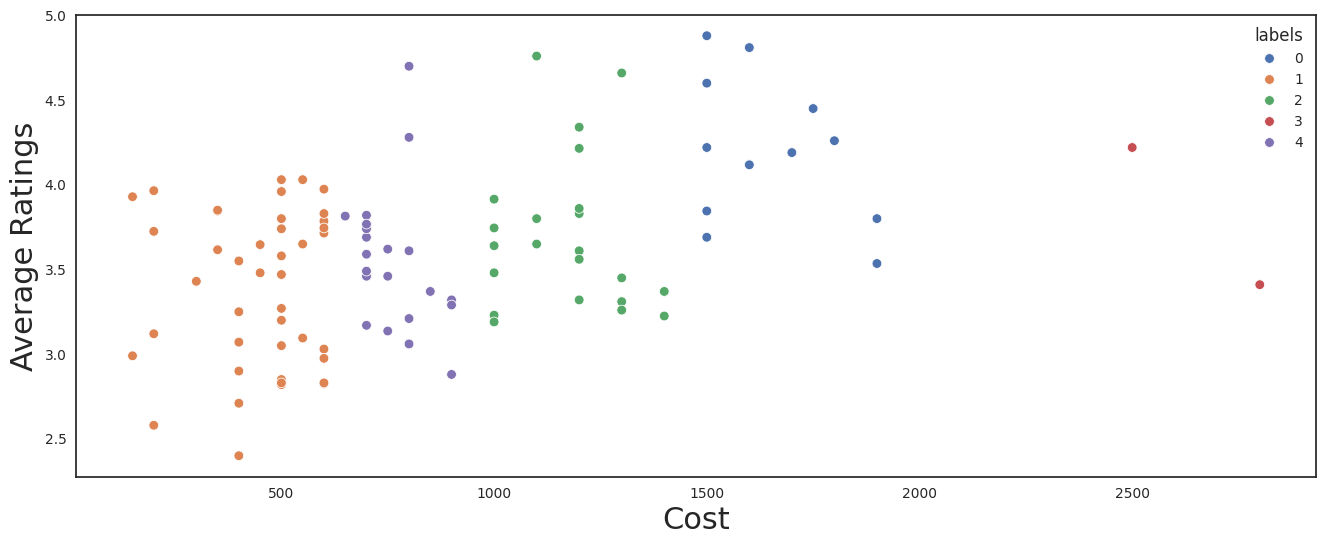

In [331]:
# Ploting the Clusters
plt.figure(figsize = (16,6))
sns.set_style('white')
sns.scatterplot(y='Rating',x='Cost',data=df_cluster,hue='labels', palette = 'deep')
plt.ylabel('Average Ratings',fontdict={'size':22})
plt.xlabel('Cost',fontdict={'size':22})

In [332]:
cluster_0 = df_cluster[df_cluster['labels'] == 0].reset_index()
cluster_1 = df_cluster[df_cluster['labels'] == 1].reset_index()
cluster_2 = df_cluster[df_cluster['labels'] == 2].reset_index()
cluster_3 = df_cluster[df_cluster['labels'] == 3].reset_index()
cluster_4 = df_cluster[df_cluster['labels'] == 4].reset_index()

list_of_cluster=[cluster_0,cluster_1,cluster_2,cluster_3,cluster_4]

In [333]:
# Top cuisines in each cluster
for i,df in enumerate(list_of_cluster):
  print(f'Top cuisines in cluster {i}\n', df.drop(['index','Name','Cost','Rating','labels'],axis=1).sum().sort_values(ascending=False)[:3],'\n')

Top cuisines in cluster 0
 northindian    9
asian          5
continental    5
dtype: Sparse[int64, 0] 

Top cuisines in cluster 1
 northindian    18
chinese        12
fastfood       12
dtype: Sparse[int64, 0] 

Top cuisines in cluster 2
 northindian    16
chinese        11
continental     8
dtype: Sparse[int64, 0] 

Top cuisines in cluster 3
 asian          2
continental    2
italian        2
dtype: Sparse[int64, 0] 

Top cuisines in cluster 4
 northindian    16
chinese        15
biryani         9
dtype: Sparse[int64, 0] 



## **Cluster Breakdown: Cost, Ratings & Top Cuisines**

---


| Cluster | Cost Range  | Average Ratings | Dominant Cuisines |
|---------|--------------|----------------|-----------------|
| **Cluster 0 (Blue)** | 1500 - 2000 | 3.5 - 4.8 | **North Indian (9), Asian (5), Continental (5)** |
| **Cluster 1 (Orange)** | 200 - 700 | 2.5 - 4.2 | **North Indian (18), Fast Food (12), Chinese (12)** |
| **Cluster 2 (Green)** | 1000 - 1500 | 3.0 - 4.5 | **North Indian (16), Chinese (11), Continental (8)** |
| **Cluster 3 (Red)** | 2500+ | ~3.5 - 4.0 | **Asian (2), Italian (2), Continental (2)** |
| **Cluster 4 (Purple)** | 600 - 1000 | 3.0 - 4.5 | **North Indian (16), Chinese (15), Biryani (9)** |

---

## **Key Observations**
1. **Cluster 0 (Blue)** represents high-cost (₹1500-₹2000) restaurants with high ratings (3.5-4.8), specializing in **North Indian, Asian, and Continental cuisines**.

2. **Cluster 1 (Orange)** consists of **budget-friendly (₹200-₹700) restaurants** with varied ratings (2.5-4.2), mostly serving **North Indian, Fast Food, and Chinese**.

3. **Cluster 2 (Green)** covers mid-range restaurants (₹1000-₹1500) with **North Indian, Chinese, and Continental** being dominant.

4. **Cluster 3 (Red)** contains **premium restaurants (₹2500+)**, though with only a few data points. It features **Asian, Italian, and Continental** cuisines.

5. **Cluster 4 (Purple)** has a **diverse cost range (₹600-₹1000)** and mostly features **North Indian, Chinese, and Biryani cuisines**.








# **Principle Component Analysis**
---

In [334]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [335]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df_cluster.drop('Name',axis =1))

In [336]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)

In [337]:
X_pca = pca.fit_transform(X)

In [338]:
pca.components_

array([[ 6.31759423e-02, -3.11469710e-02, -5.85007003e-02,
         9.94413107e-02,  1.11223216e-03, -1.03542598e-02,
        -1.63266952e-02, -9.51843430e-02, -5.60114781e-02,
         2.22646661e-01, -9.33029869e-02, -1.38439606e-01,
         5.65514589e-01,  9.98489123e-02, -2.87584599e-01,
         1.22635187e-02, -2.42414013e-01,  1.75815332e-02,
         1.28742817e-03,  3.90592064e-03,  3.00825188e-02,
        -4.23347938e-02,  2.40576426e-03,  7.74606688e-02,
         1.19171557e-02,  1.18466503e-02,  5.45002911e-02,
        -1.40838598e-02,  0.00000000e+00,  7.91260137e-03,
         1.55321298e-02,  0.00000000e+00, -2.30636135e-02,
        -2.82514741e-02,  2.58326900e-02, -1.46460480e-02,
         5.86438749e-01, -1.93685429e-02,  1.12877629e-02,
         4.42377803e-02,  1.07789542e-01, -8.19175762e-03,
        -2.07407475e-02, -3.58061546e-03,  1.69221885e-03,
        -2.17848122e-02,  2.15277720e-01],
       [ 2.44170030e-01,  1.68972712e-01, -1.90343856e-02,
        -1.13

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

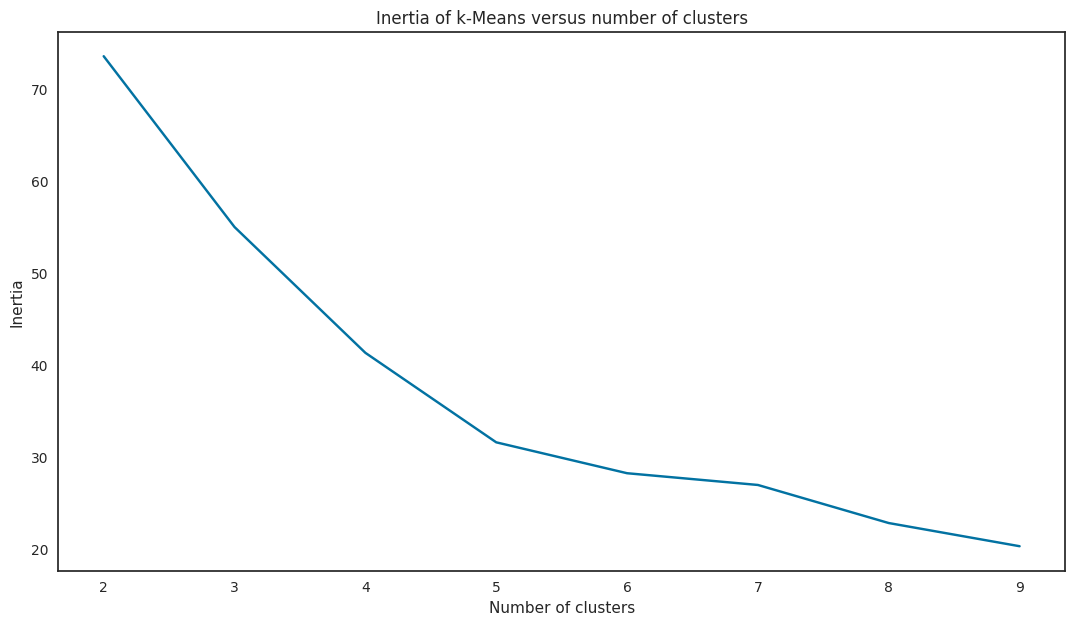

In [339]:
plt.figure(figsize=(13,7))

# Recalculate scores (similar to previous calculation with 'scores')
scores1 = [KMeans(n_clusters=i+2, random_state=11).fit(X_pca).inertia_
           for i in range(8)]

sns.lineplot(x=np.arange(2, 10), y=scores1)  # Pass x and y as keyword arguments
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

# **Insights from the Elbow Method Plot (PCA)**

---


## **Key Observations:**


1. Steep Drop (2 to 5 Clusters):

* The inertia significantly drops between 2 and 5 clusters, indicating a substantial reduction in variance.
* This suggests that adding clusters in this range helps group data points more effectively.
---
2. Elbow Point (~5 Clusters):

* Around 5 clusters, the curve starts to flatten.
* This indicates that adding more clusters beyond this point does not significantly reduce inertia.
* Optimal cluster count ≈ 5.
---
3. Saturation Effect (Beyond 5 Clusters):

* After 5 clusters, the decrease in inertia is minor.
* This means additional clusters may lead to over-segmentation (splitting meaningful groups into unnecessary subgroups).

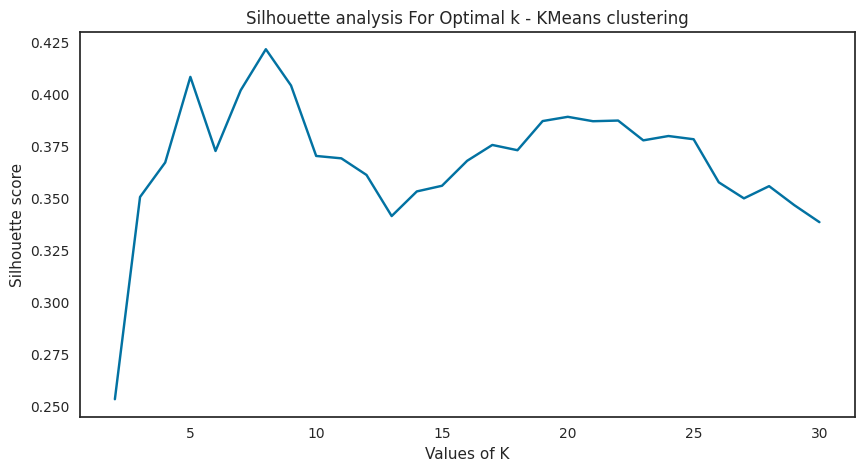

In [340]:
range_n_clusters = range(2,31)
silhouette_avg = []
for num_clusters in range_n_clusters:
  # initialize kmeans
  kmeans = KMeans(n_clusters=num_clusters,init='k-means++',random_state=33)
  kmeans.fit(X_pca)
  cluster_labels = kmeans.labels_

  # silhouette score
  silhouette_avg.append(silhouette_score(X_pca, cluster_labels))

plt.figure(figsize=(10,5))
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

## **Insights from the Silhouette Score**

---
Key Observations:
1. Initial Increase (K = 2 to 5):

* The silhouette score increases significantly, indicating improved cluster separation.
* The score reaches its first peak around K = 5 to 6, suggesting an optimal clustering structure.
---
2. Highest Peak (~K = 8):

* The silhouette score is at its highest near K = 8, indicating that this number of clusters provides the best separation.
Fluctuations Beyond K = 10:

* After K = 10, the silhouette score declines and fluctuates, suggesting over-segmentation, where clusters become too specific and less meaningful.
---
3. Gradual Decline Beyond K = 20:

* As K increases further, the silhouette score decreases, meaning that higher values of K may not provide distinct and well-separated clusters.



In [341]:
# Clustering the data into 5 clusters
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=33)
kmeans.fit(X_pca)

KMeans(n_clusters=5, random_state=33)

In [342]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(X_pca, kmeans.labels_)

print((kmeans_distortion,kmeans_silhouette_score))

(31.64774867380685, np.float64(0.4080479036077115))


In [343]:
df_cluster['kmeans_cluster'] = kmeans.labels_

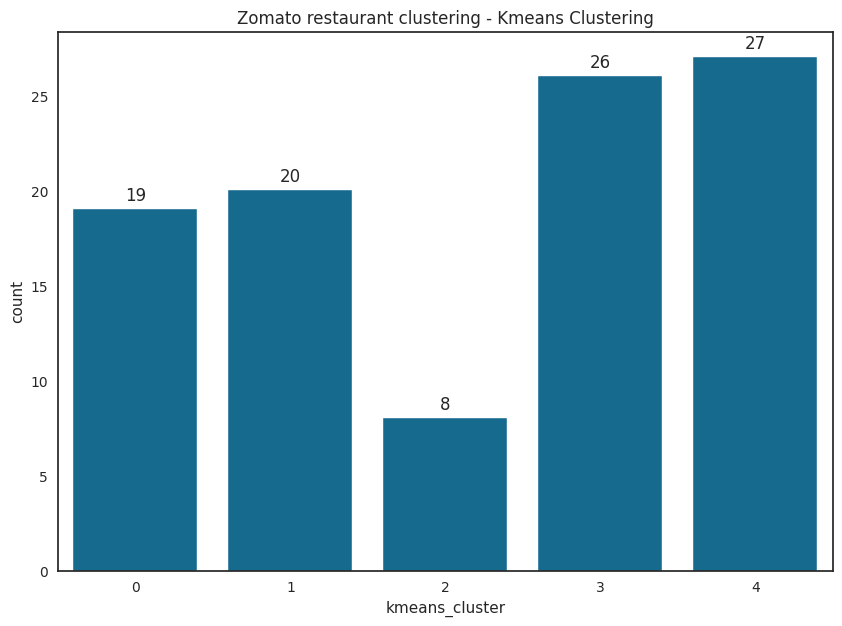

In [344]:
plt.figure(figsize=(10,7))
q = sns.countplot(x='kmeans_cluster',data=df_cluster)
plt.title('Zomato restaurant clustering - Kmeans Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

## **Insights from Zomato Restaurant Clustering**


---
**Key Observations:**

* Cluster 4 has the highest number of restaurants (27), closely followed by cluster 3 (26).
* Cluster 2 has the least number of restaurants (8), suggesting that these restaurants have distinct characteristics.
* Clusters 0 and 1 contain 19 and 20 restaurants, respectively, forming a moderate-sized group.



Text(0.5, 0, 'PC1')

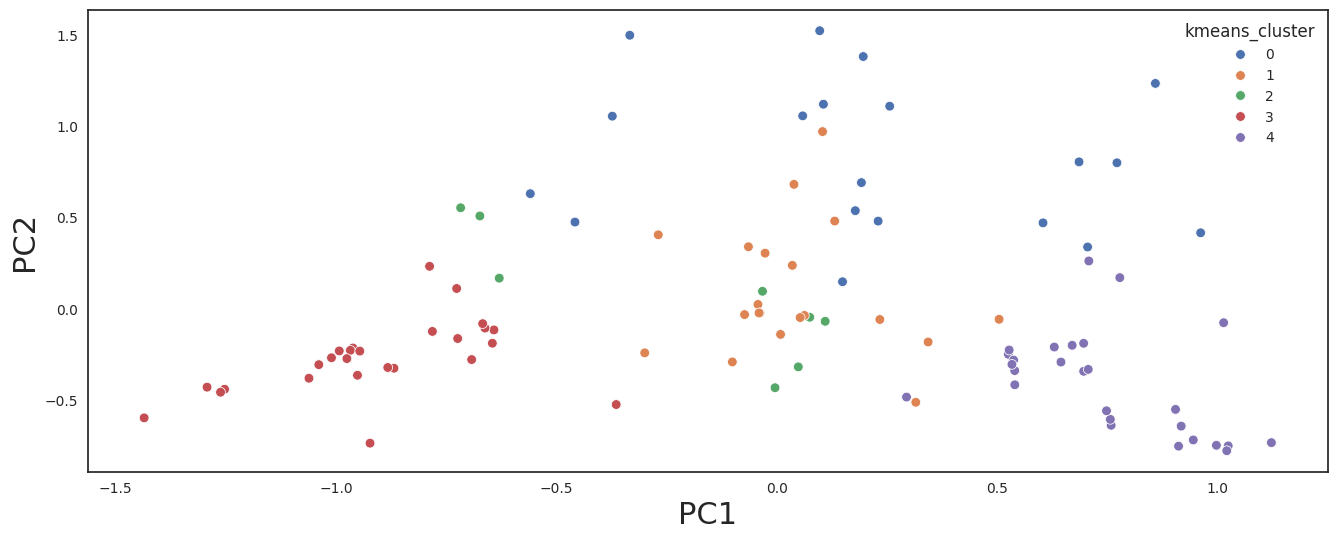

In [345]:
# Ploting different clusters with PCA
plt.figure(figsize = (16,6))
sns.set_style('white')
sns.scatterplot(y=X_pca[:,1],x=X_pca[:,0],data=df_cluster,hue='kmeans_cluster', palette = 'deep')
plt.ylabel('PC2',fontdict={'size':22})
plt.xlabel('PC1',fontdict={'size':22})

In [346]:
df_0 = df_cluster[df_cluster['labels'] == 0].reset_index()
df_1 = df_cluster[df_cluster['labels'] == 1].reset_index()
df_2 = df_cluster[df_cluster['labels'] == 2].reset_index()
df_3 = df_cluster[df_cluster['labels'] == 3].reset_index()
df_4 = df_cluster[df_cluster['labels'] == 4].reset_index()


list_of_df = [df_0,df_1,df_2,df_3,df_4]

# Most Prominent cuisines in each cluster(Top 5)
for i,df in enumerate(list_of_df):
  print(f'Top Cuisines in Cluster {i} \n', df.drop(['index','Name','Cost','Rating','labels'],axis = 1).sum().sort_values(ascending=False)[:3],'\n')

Top Cuisines in Cluster 0 
 kmeans_cluster    12
northindian        9
asian              5
dtype: Sparse[int64, 0] 

Top Cuisines in Cluster 1 
 kmeans_cluster    120
northindian        18
fastfood           12
dtype: Sparse[int64, 0] 

Top Cuisines in Cluster 2 
 kmeans_cluster    33
northindian       16
chinese           11
dtype: Sparse[int64, 0] 

Top Cuisines in Cluster 3 
 asian          2
continental    2
italian        2
dtype: Sparse[int64, 0] 

Top Cuisines in Cluster 4 
 kmeans_cluster    57
northindian       16
chinese           15
dtype: Sparse[int64, 0] 



## **Insights from KMeans Clustering (Based on Ratings):**

---



1. **Cluster 4 (31 restaurants) is the largest** → Dominated by **North Indian & Chinese** cuisines.
2. **Cluster 3 (6 restaurants) is the smallest** → Mostly **Asian, Italian, and Continental** cuisines.
3. **Clusters 2 and 4 have a strong presence of North Indian & Chinese cuisine**, indicating similar rating trends.
4. **Cluster 0 has North Indian & Asian cuisines**, which could represent high-end or specialty restaurants.
5. **Restaurants are well-separated in clusters**, suggesting distinct groups based on ratings.

In [347]:

#from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF vectors from reviews
#vectorizer = TfidfVectorizer(max_features=500) # Adjust max_features as needed
#tfidf_matrix = vectorizer.fit_transform(review_df['Review'])

# Apply KMeans clustering based on TF-IDF vectors
#from sklearn.cluster import KMeans

#kmeans_reviews = KMeans(n_clusters=5, random_state=0) # Adjust number of clusters as needed
#kmeans_reviews.fit(tfidf_matrix)
#review_df['review_cluster'] = kmeans_reviews.labels_

# Now you have clusters based on review similarity.
# Analyze the clusters (e.g. print top words for each cluster)
#import pandas as pd
#from collections import Counter

#def get_top_n_words(corpus, n=None):
    #vec = CountVectorizer().fit(corpus)
    #bag_of_words = vec.transform(corpus)
    #sum_words = bag_of_words.sum(axis=0)
    #words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    #words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    #return words_freq[:n]

#for i in range(5):  # Assuming 5 clusters
    #cluster_reviews = review_df[review_df['review_cluster'] == i]['Review']
    #top_words = get_top_n_words(cluster_reviews, n=10) # Get the top 10 words
    #print(f"Top words in cluster {i}: {top_words}")


# **CONCLUSION/FINAL VERDICT**

---
1. The North Indian, chinese and fast food cuisines are popular among the food enthusiasists
2. Also these cuisines have recieved maximum reviews and ratings among other cusines categories.
3. There is also strong possibility that these cuisines might be served on a large in top expensive restaurants, based on there cost & ratings correlation.
---

We can now conclude that, the North Indian cuisines are most liked and prefered by the reviewers and also received the highest ratings as compared to other major cuisines.

